In [37]:
import numpy as np
from scipy.misc import imread
from matplotlib import pyplot as plt
import cv2



image = cv2.imread("images/resized_data/validation/cz25right.png",0)
image = cv2.medianBlur(image,7)
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#image = clahe.apply(image)


height = image.shape[0]
width = image.shape[1]
w = 0 
b = 0 
g = 0 
for i in range(0,height):
    for j in  range(0,width-1):
        if (image[i][j]>180):
            w = w+1
            
        elif(image[i][j]<25):
            b = b+1
        
area=image.shape[0]*image.shape[1]
g=area-(w+b)
#print('White >>>',w,'|black >>>',b,'|Gray >>>',g)

W_percentage=  (w/area)*100
B_percentage=  (b/area)*100
G_percentage=  (g/area)*100

mean_result = np.mean(image) 
variance_result =np.var(image)/10
median_result = np.median(image).item()
#median_result=median_result+5

classi = ['Healthy','Acute','SubAcute','Chronic','UnHealthy'] # تم وضع الunhealthy 
                                                              #للتجربة فقط سيتم ازالتها لاحقا 

#print(W_percentage,B_percentage,G_percentage)
print("")

B_percentage=B_percentage+(W_percentage/2)
G_percentage=G_percentage+(W_percentage/2)
#print(B_percentage,G_percentage)
print('black Persentage >',B_percentage,'%','| Gray Persentage>',G_percentage,'%')

mean_result = np.mean(image) 
variance_result =np.var(image) /10
gray_result = G_percentage
if(G_percentage>B_percentage):rightStatus = classi[4]
else: rightStatus = classi[0] 
print(rightStatus)
print("Mean: ",mean_result)
print("Median: ",median_result)
print("gray_result: ",gray_result)


black Persentage > 4.20125 % | Gray Persentage> 95.79875 %
UnHealthy
Mean:  84.4472
Median:  75.0
gray_result:  95.79875


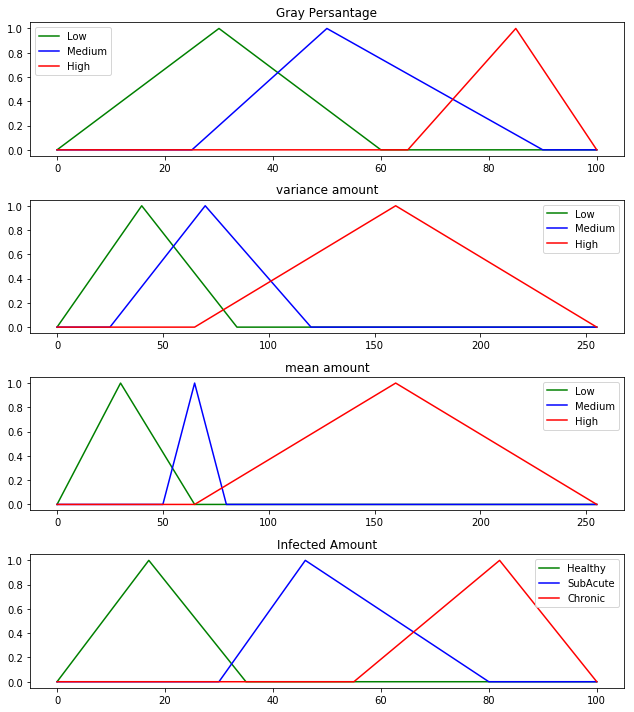

In [38]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points




gray = np.arange(0, 101, 1)
variance = np.arange(0, 256, 1)
mean  = np.arange(0, 256, 1)
diagnos = np.arange(0,101,1)
#entropy = np.arrange(0,601,301)

# Generate fuzzy membership functions
gray_l = fuzz.trimf(gray, [0, 30, 60])
gray_m = fuzz.trimf(gray, [25, 50, 90])
gray_h = fuzz.trimf(gray, [65, 85, 100])

#gray_m = fuzz.trimf(gray, [0, 50, 90])
#gray_h = fuzz.trimf(gray, [65, 100, 100])


var_l = fuzz.trimf(variance, [ 0, 40, 85])
var_m = fuzz.trimf(variance, [ 25, 70, 120])
var_h = fuzz.trimf(variance, [65, 160,255])



mean_l = fuzz.trimf(mean, [0, 30, 65])
mean_m = fuzz.trimf(mean, [50, 65, 80])
mean_h = fuzz.trimf(mean, [65, 160, 255])


diagnos_healthy=fuzz.trimf(diagnos, [0, 17, 35])
diagnos_subacute=fuzz.trimf(diagnos, [30, 46, 80])
diagnos_chronic=fuzz.trimf(diagnos, [55, 82, 100])

''''''
# Visualize these universes and membership functions
#fig, (ax0, ax1, ax2,ax3) =
fig, (ax0,ax1,ax2,ax3) =plt.subplots(nrows=4, figsize=(9, 10))

ax0.plot(gray , gray_l, 'g', linewidth=1.5, label='Low',color='green')
ax0.plot(gray , gray_m, 'b', linewidth=1.5, label='Medium',color='blue')
ax0.plot(gray , gray_h, 'r', linewidth=1.5, label='High',color = 'red')
ax0.set_title('Gray Persantage')
ax0.legend()

ax1.plot(variance, var_l, 'g', linewidth=1.5, label='Low',color='green')
ax1.plot(variance, var_m, 'b', linewidth=1.5, label='Medium',color='blue')
ax1.plot(variance, var_h, 'r', linewidth=1.5, label='High',color = 'red')
ax1.set_title('variance amount')
ax1.legend()

ax2.plot(mean, mean_l, 'g', linewidth=1.5, label='Low',color="green")
ax2.plot(mean, mean_m, 'b', linewidth=1.5, label='Medium',color='blue')
ax2.plot(mean, mean_h, 'r', linewidth=1.5, label='High',color = 'red')
ax2.set_title('mean amount')
ax2.legend()

ax3.plot(diagnos, diagnos_healthy, 'g', linewidth=1.5, label='Healthy',color="green")
ax3.plot(diagnos, diagnos_subacute, 'b', linewidth=1.5, label='SubAcute',color='blue')
ax3.plot(diagnos, diagnos_chronic, 'r', linewidth=1.5, label='Chronic',color = 'red')
ax3.set_title('Infected Amount')
ax3.legend()



    # Turn off top/right axes
for ax in (ax0,ax1,ax2,ax3):
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

95.79875 75.0 84.4472


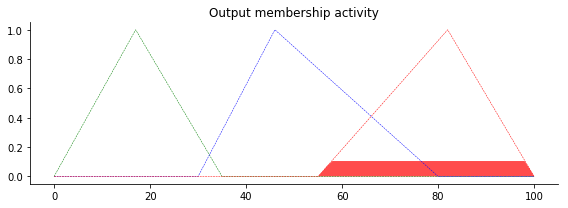

In [39]:

gray_level_l = fuzz.interp_membership(gray, gray_l, gray_result)
gray_level_m = fuzz.interp_membership(gray, gray_m, gray_result)
gray_level_h = fuzz.interp_membership(gray, gray_h, gray_result)

var_level_l =  fuzz.interp_membership(variance, var_l, median_result)
var_level_m =  fuzz.interp_membership(variance, var_m, median_result)
var_level_h =  fuzz.interp_membership(variance, var_h, median_result)

mean_level_l =  fuzz.interp_membership(mean, mean_l, mean_result)
mean_level_m =  fuzz.interp_membership(mean, mean_m, mean_result)
mean_level_h =  fuzz.interp_membership(mean, mean_h, mean_result)

print(gray_result,median_result,mean_result)
#Rule 1 Gray Low and (Mean low or Medium) and Median Low

active_rule1 = np.fmax(mean_level_l , mean_level_m)
#print(mean_level_l,var_level_l,diagnos_healthy)
active_rule1 = np.fmin(active_rule1 , gray_level_l)
active_rule1 = np.fmin(active_rule1 , var_level_l)
diagnose_activation_h = np.fmin(active_rule1, diagnos_healthy)  # removed entirely to 0

# Rule 2 Median Medium and (Gray High or Gray Medium) and Mean Medium
active_rule2 = np.fmax(gray_level_m , gray_level_h)
active_rule2 = np.fmin(active_rule2 , var_level_m)
active_rule2 = np.fmin(active_rule2 , mean_level_m)
diagnose_activation_s = np.fmin(active_rule2, diagnos_subacute)



#Rule 3 Gray High And Mean High And Median High
active_rule3 = np.fmin(gray_level_h , var_level_h)
active_rule3 = np.fmin(active_rule3 , mean_level_h)
diagnose_activation_c = np.fmin(active_rule3, diagnos_chronic)


diagnos0 = np.zeros_like(diagnos)


# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(diagnos, diagnos0, diagnose_activation_h, facecolor='g', alpha=0.7,label="Helathy")
ax0.plot(diagnos, diagnos_healthy, 'g', linewidth=0.5, linestyle='--', )
ax0.fill_between(diagnos, diagnos0, diagnose_activation_s, facecolor='b', alpha=0.7,label="SubAcute")
ax0.plot(diagnos, diagnos_subacute, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(diagnos, diagnos0, diagnose_activation_c, facecolor='r', alpha=0.7,label="Chronic")
ax0.plot(diagnos, diagnos_chronic, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()



## Defuzzyfication

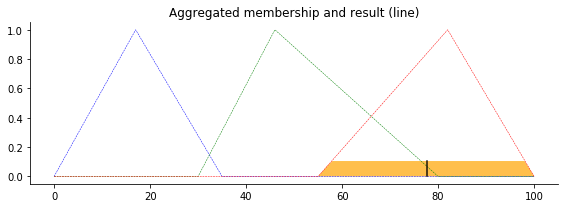

Inffected:  77.7314633616 0.10526315789473684
Chronic


In [40]:
# Aggregate all three output membership functions together
aggregated = np.fmax(diagnose_activation_h,
                     np.fmax(diagnose_activation_s, diagnose_activation_c))

diagnos_deffuz= fuzz.defuzz(diagnos, aggregated, 'centroid')
diagnose_activation = fuzz.interp_membership(diagnos, aggregated, diagnos_deffuz)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(diagnos, diagnos_healthy, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(diagnos, diagnos_subacute, 'g', linewidth=0.5, linestyle='--')
ax0.plot(diagnos, diagnos_chronic, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(diagnos, diagnos0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([diagnos_deffuz, diagnos_deffuz], [0, diagnose_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

print("Inffected: ",diagnos_deffuz,diagnose_activation)
if(diagnos_deffuz<=45):print("Helathy")
elif(diagnos_deffuz>45 and diagnos_deffuz<70):print("SubAcute")
else:print("Chronic")